In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv("sales_data.csv")
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017081 entries, 0 to 1017080
Data columns (total 22 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Order_ID        1017081 non-null  int64  
 1   Branch          1017081 non-null  object 
 2   Order_Date      1017081 non-null  object 
 3   Order_Priority  1017081 non-null  object 
 4   Manufacturer    1017081 non-null  object 
 5   Model_Name      1017081 non-null  object 
 6   Category        1017081 non-null  object 
 7   Screen_Size     1017081 non-null  object 
 8   Screen          1017081 non-null  object 
 9   CPU             1017081 non-null  object 
 10  RAM             1017081 non-null  object 
 11  Storage         1017081 non-null  object 
 12  GPU             1017081 non-null  object 
 13  OS              1017081 non-null  object 
 14  OS_Version      908989 non-null   object 
 15  Weight          1017081 non-null  object 
 16  Price           1017081 non-null  in

In [3]:
dataset.sample(5)

,Order_ID,Branch,Order_Date,Order_Priority,Manufacturer,Model_Name,Category,Screen_Size,Screen,CPU,...,GPU,OS,OS_Version,Weight,Price,Quantity,Discount,Total_Price,Profit,Ship_Duration
314100,314100,Isfahan,1397-01-01,M,Dell,Inspiron 5567,Notebook,"15.6""",Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,...,AMD Radeon R7 M445,Windows,10,2.3kg,4200000,1,0,4200000.0,400000,6
741746,741746,Tehran,1391-04-18,H,HP,255 G6,Notebook,"15.6""",1366x768,AMD A6-Series 9220 2.5GHz,...,AMD Radeon R4 Graphics,Windows,10,1.86kg,650000,1,0,650000.0,70000,2
373717,373717,Zanjan,1402-07-13,M,Asus,Rog G752VL-UH71T,Gaming,"17.3""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6700HQ 2.6GHz,...,Nvidia GeForce GTX 965M,Windows,10,4.33kg,63000000,1,0,63000000.0,6480000,6
926332,926332,Zanjan,1390-10-29,L,Dell,XPS 13,Ultrabook,"13.3""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,...,Intel HD Graphics 620,Windows,10,1.29kg,1600000,1,0,1600000.0,150000,8
873942,873942,Tabriz,1400-05-13,M,Lenovo,B51-80 (i5-6200U/8GB/1008GB/Radeon,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,...,AMD Radeon R5 M330,Windows,10,2.5kg,20250000,1,0,20250000.0,1030000,5


In [4]:
t_ds = dataset[['Order_Date', 'Model_Name', 'Price']]
t_ds.groupby(by=['Model_Name'], group_keys=True).apply(lambda x:x)

Order_Date  \
Model_Name                                              
110-15ACL (A6-7310/4GB/500GB/W10) 12022    1396-10-27   
                                  22245    1395-09-02   
                                  23887    1394-11-28   
                                  30651    1401-02-09   
                                  32044    1397-08-10   
...                                               ...   
Zenbook UX510UW-FI095T            1014443  1399-07-25   
                                  1014548  1393-02-22   
                                  1014702  1399-07-04   
                                  1016398  1398-08-24   
                                  1017012  1401-01-27   

                                                                  Model_Name  \
Model_Name                                                                     
110-15ACL (A6-7310/4GB/500GB/W10) 12022    110-15ACL (A6-7310/4GB/500GB/W10)   
                                  22245    110-15ACL (A6-7310/4GB/500GB/W10)   
                                  23887    110-15ACL (A6-7310/4GB/500GB/W10)   
                                  30651    110-15ACL (A6-7310/4GB/500GB/W10)   
                                  32044    110-15ACL (A6-7310/4GB/500GB/W10)   
...                                                                      ...   
Zenbook UX510UW-FI095T            1014443             Zenbook UX510UW-FI095T   
                                  1014548             Zenbook UX510UW-FI095T   
                                  1014702             Zenbook UX510UW-FI095T   
                                  1016398             Zenbook UX510UW-FI095T   
                                  1017012             Zenbook UX510UW-FI095T   

                                              Price  
Model_Name                                           
110-15ACL (A6-7310/4GB/500GB/W10) 12022     1350000  
                                  22245     1050000  
                                  23887     1000000  
                                  30651     8300000  
                                  32044     4100000  
...                                             ...  
Zenbook UX510UW-FI095T            1014443  41150000  
                                  1014548   4200000  
                                  1014702  36050000  
                                  1016398  14950000  
                                  1017012  35700000  

[1017081 rows x 3 columns]

In [5]:
dataset['Order_Date'] = dataset['Order_Date'].str[:4]
dataset['Order_Date']

0          1396
1          1394
2          1402
3          1397
4          1392
           ... 
1017076    1395
1017077    1391
1017078    1399
1017079    1394
1017080    1390
Name: Order_Date, Length: 1017081, dtype: object

In [6]:
new_frame = dataset
grouped = new_frame.groupby(['Model_Name', 'Order_Date'])

new_frame = grouped.agg({'Price': 'mean',
                     'Manufacturer': 'first',
                     'Category': 'first',
                     'Screen_Size': 'first',
                     'Screen': 'first',
                     'CPU': 'first',
                     'RAM': 'first',
                     'Storage': 'first',
                     'GPU': 'first',
                     'OS': 'first',
                     'OS_Version': 'first',
                     'Weight': 'first'}).reset_index()
new_frame

,Model_Name,Order_Date,Price,Manufacturer,Category,Screen_Size,Screen,CPU,RAM,Storage,GPU,OS,OS_Version,Weight
0,110-15ACL (A6-7310/4GB/500GB/W10),1390,5.500000e+05,Lenovo,Notebook,"15.6""",1366x768,AMD A6-Series 7310 2GHz,4GB,500GB HDD,AMD Radeon R4,Windows,10,2.19kg
1,110-15ACL (A6-7310/4GB/500GB/W10),1391,7.100000e+05,Lenovo,Notebook,"15.6""",1366x768,AMD A6-Series 7310 2GHz,4GB,500GB HDD,AMD Radeon R4,Windows,10,2.19kg
2,110-15ACL (A6-7310/4GB/500GB/W10),1392,9.500000e+05,Lenovo,Notebook,"15.6""",1366x768,AMD A6-Series 7310 2GHz,4GB,500GB HDD,AMD Radeon R4,Windows,10,2.19kg
3,110-15ACL (A6-7310/4GB/500GB/W10),1393,9.416667e+05,Lenovo,Notebook,"15.6""",1366x768,AMD A6-Series 7310 2GHz,4GB,500GB HDD,AMD Radeon R4,Windows,10,2.19kg
4,110-15ACL (A6-7310/4GB/500GB/W10),1394,1.000000e+06,Lenovo,Notebook,"15.6""",1366x768,AMD A6-Series 7310 2GHz,4GB,500GB HDD,AMD Radeon R4,Windows,10,2.19kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8024,Zenbook UX510UW-FI095T,1398,1.662103e+07,Asus,Notebook,"15.6""",IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows,10,2kg
8025,Zenbook UX510UW-FI095T,1399,2.958960e+07,Asus,Notebook,"15.6""",IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows,10,2kg
8026,Zenbook UX510UW-FI095T,1400,3.318913e+07,Asus,Notebook,"15.6""",IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows,10,2kg
8027,Zenbook UX510UW-FI095T,1401,4.320300e+07,Asus,Notebook,"15.6""",IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows,10,2kg


In [7]:
for col in new_frame.columns:
    print(col, new_frame[col].value_counts().shape)

Model_Name (618,)
Order_Date (13,)
Price (7677,)
Manufacturer (19,)
Category (6,)
Screen_Size (18,)
Screen (39,)
CPU (110,)
RAM (9,)
Storage (38,)
GPU (104,)
OS (7,)
OS_Version (4,)
Weight (178,)


In [8]:
# new_frame.drop('Model_Name', inplace=True, axis=1)
def rmkg(char = str):
    char = float(char.replace('k', '').replace('g', '').replace('s', ''))
    return char
new_frame['Weight'] = new_frame['Weight'].apply(rmkg)

<Axes: xlabel='Manufacturer', ylabel='count'>

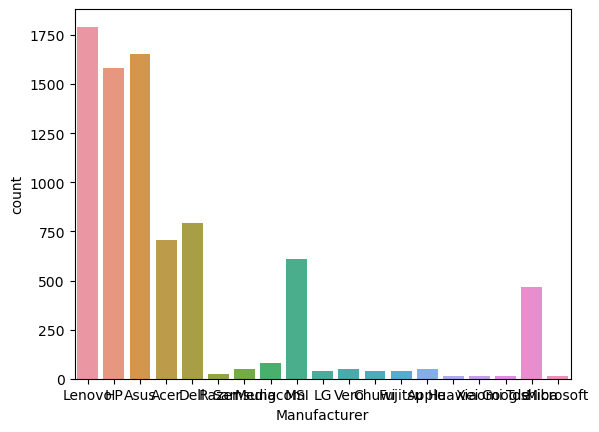

In [9]:
sns.countplot(data=new_frame, x='Manufacturer')

In [10]:
X = new_frame.loc[:, new_frame.columns != 'Price']
X.drop('Model_Name', axis=1, inplace=True)
Y = new_frame['Price']

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_4280\3782748891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Model_Name', axis=1, inplace=True)


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.loc[:, X.columns != 'Weight'] = X.loc[:, X.columns != 'Weight'].apply(le.fit_transform)
X

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_4280\4108096412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, X.columns != 'Weight'] = X.loc[:, X.columns != 'Weight'].apply(le.fit_transform)
C:\Users\Mahdi\AppData\Local\Temp\ipykernel_4280\4108096412.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, X.columns != 'Weight'] = X.loc[:, X.columns != 'Weight'].apply(le.fit_transform)


,Order_Date,Manufacturer,Category,Screen_Size,Screen,CPU,RAM,Storage,GPU,OS,OS_Version,Weight
0,0,10,3,14,0,7,5,25,13,5,0,2.19
1,1,10,3,14,0,7,5,25,13,5,0,2.19
2,2,10,3,14,0,7,5,25,13,5,0,2.19
3,3,10,3,14,0,7,5,25,13,5,0,2.19
4,4,10,3,14,0,7,5,25,13,5,0,2.19
...,...,...,...,...,...,...,...,...,...,...,...,...
8024,8,2,3,14,12,90,8,16,83,5,0,2.00
8025,9,2,3,14,12,90,8,16,83,5,0,2.00
8026,10,2,3,14,12,90,8,16,83,5,0,2.00
8027,11,2,3,14,12,90,8,16,83,5,0,2.00


<Axes: >

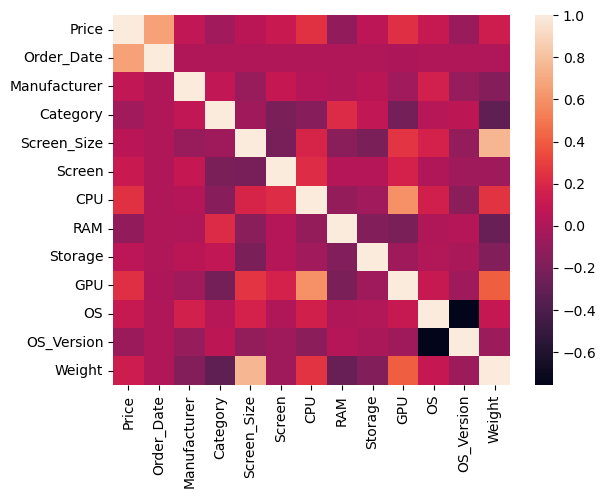

In [14]:
test_f = pd.concat([Y, X], axis=1)
sns.heatmap(test_f.corr())

In [15]:
corr_matrix = test_f.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] < 0.001) and any(upper[column] > -0.001)]
test_f.drop(to_drop, axis=1, inplace= True)
test_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8029 entries, 0 to 8028
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       8029 non-null   float64
 1   Order_Date  8029 non-null   int32  
 2   CPU         8029 non-null   int32  
 3   RAM         8029 non-null   int32  
 4   Storage     8029 non-null   int32  
 5   GPU         8029 non-null   int32  
 6   Weight      8029 non-null   float64
dtypes: float64(2), int32(5)
memory usage: 282.4 KB


In [17]:
X = test_f.loc[:, test_f.columns != 'Price']
# X.drop('Model_Name', axis=1, inplace=True)
Y = test_f['Price']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.18, random_state=7)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train['Weight'] = sc.fit_transform(pd.DataFrame(X_train['Weight']))
X_test['Weight'] = sc.transform(pd.DataFrame(X_test['Weight']))
X_test

,Order_Date,CPU,RAM,Storage,GPU,Weight
2270,10,95,1,16,74,-0.681960
7010,8,95,8,3,70,-0.118206
4748,6,69,5,15,50,-0.176027
2436,7,95,1,29,75,2.989669
2099,8,95,8,3,70,0.185354
...,...,...,...,...,...,...
6787,6,52,5,25,44,-0.248303
1515,9,90,8,28,50,-1.173438
2024,11,95,1,16,74,1.052668
7158,0,52,8,15,21,-0.103751


In [19]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=5)
X_train = pf.fit_transform(X_train)
X_test = pf.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9002847364965891

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X, Y)
y_pred = model.predict(X)

from sklearn.metrics import r2_score

r2_score(Y, y_pred)

0.9277811814965476

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GradientBoostingRegressor
gbr = GradientBoostingRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)  # X and y are your data and target variables

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
y_pred = grid_search.predict(X_test)
r2_score(y_test, y_pred)

In [43]:
yy = pd.Series(y_test).reset_index()
y = pd.Series(y_pred).reset_index()
final_csv = pd.concat([yy.drop('index', axis=1), y.drop('index', axis=1)], axis=1)
final_csv.to_csv('final_pred.csv', index=False)
final_csv

,Price,0
0,4.851379e+07,5.604139e+05
1,1.408018e+07,5.372476e+05
2,4.355727e+06,5.863094e+05
3,2.291667e+07,5.743558e+05
4,1.485000e+07,3.636573e+05
...,...,...
8024,NaN,1.617606e+07
8025,NaN,2.707159e+07
8026,NaN,3.357620e+07
8027,NaN,4.382364e+07
